In [1]:
load("cbMen.rda")
load("cbWomen.rda")

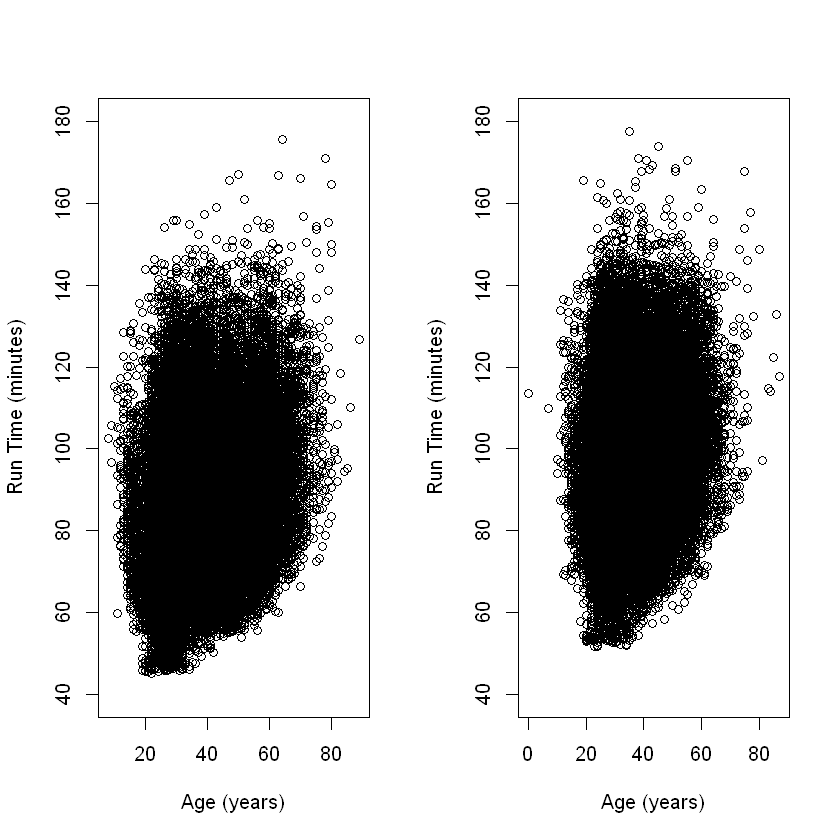

In [11]:
# pdf("CB_Overplot.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

par(mfrow=c(1, 2))
plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
plot(runTime ~ age, data = cbWomen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

# par(oldPar)
# dev.off()

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

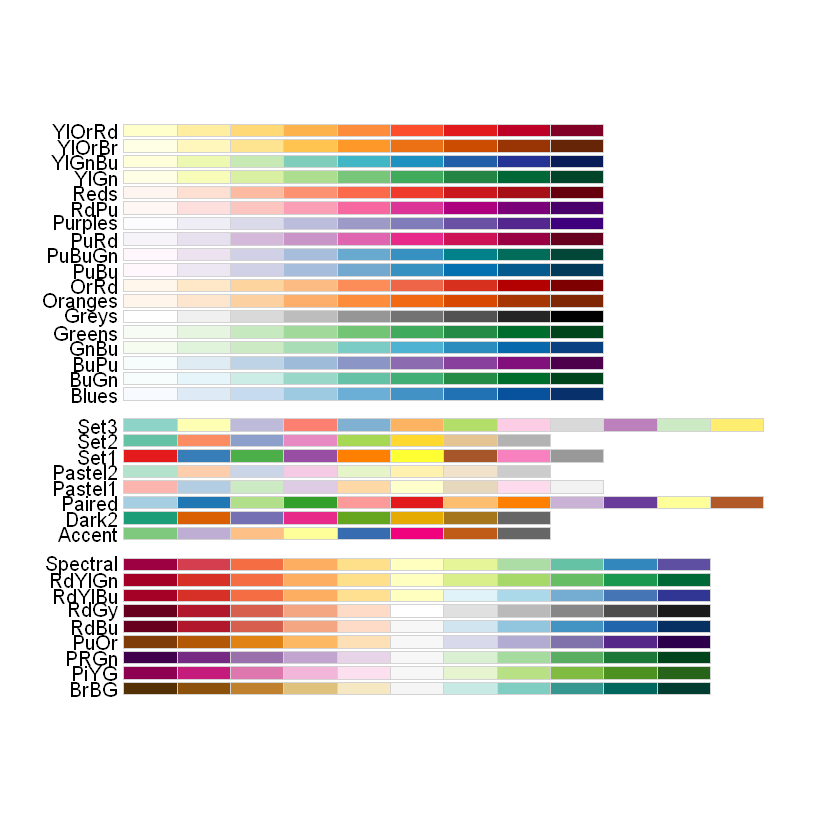

In [3]:
library(RColorBrewer)
ls("package:RColorBrewer")

display.brewer.all()

In [12]:
Purples8 = brewer.pal(9, "Purples")[8]
Purples8

[1] "#54278F"

In [13]:
Purples8A = paste(Purples8, "14", sep = "")

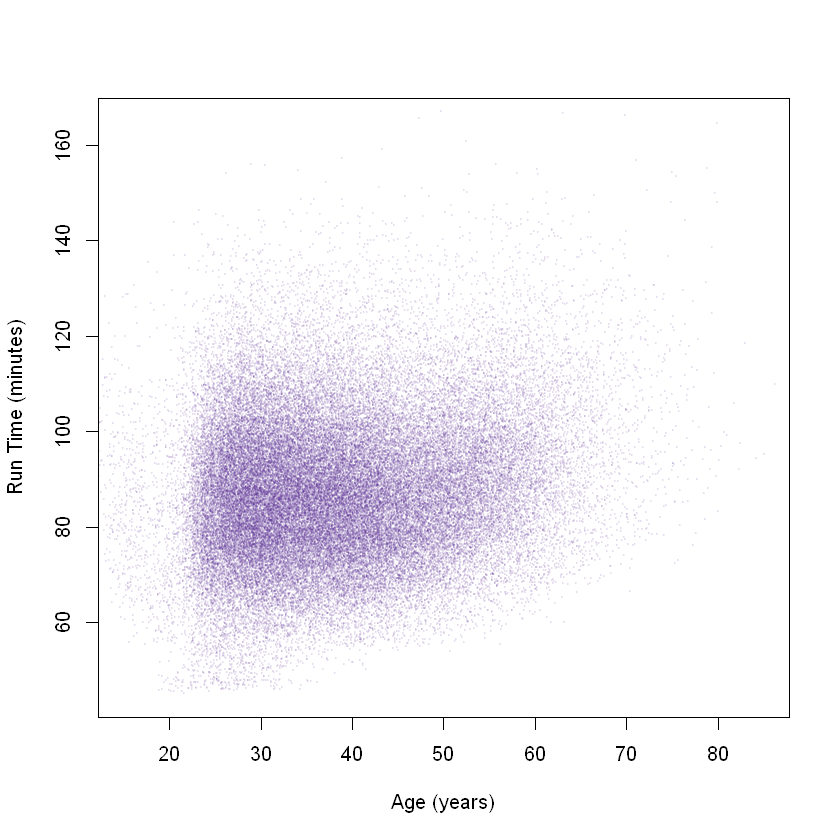

In [14]:
# pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
# par(oldPar)
# dev.off()

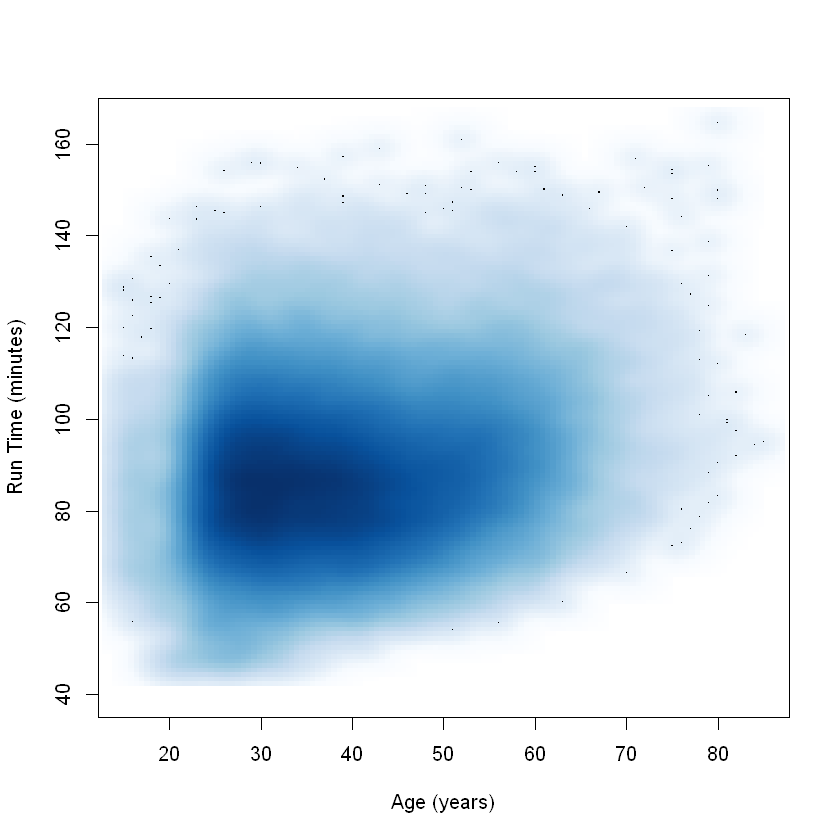

In [15]:
# pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

# par(oldPar)
# dev.off()

In [17]:
cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5804   25434   20535   12212    5001     752      69 

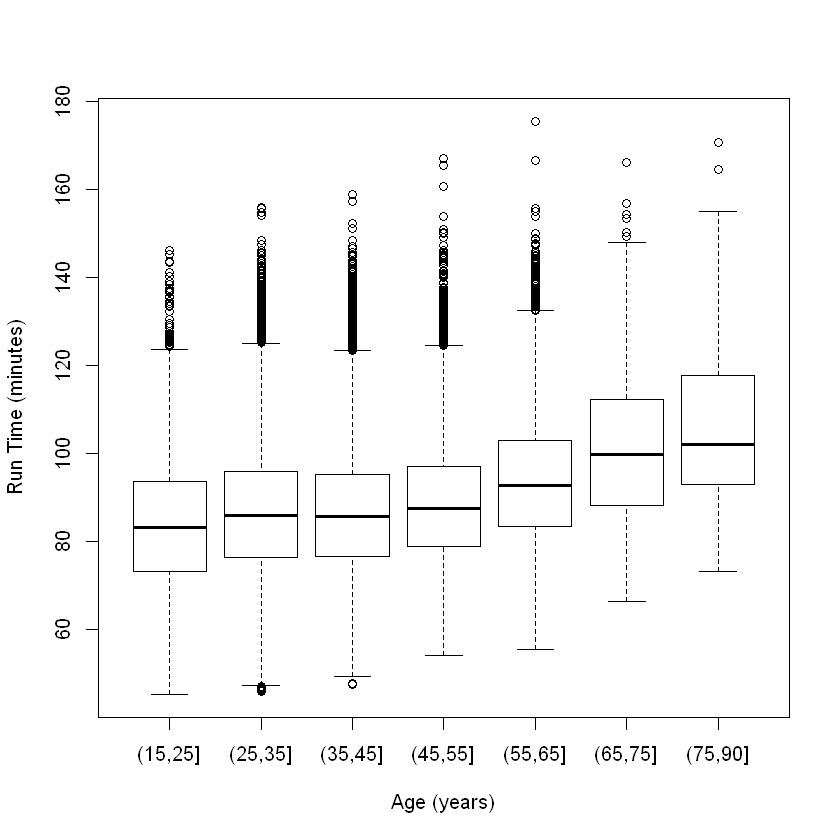

In [19]:
# pdf("CB_Boxplots.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

# par(oldPar)
# dev.off()

In [21]:
lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

(Intercept)         age 
 78.7573254   0.2252748

In [22]:
summary(lmAge)


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.333 -10.220  -0.952   9.102  82.425 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 78.757325   0.207692  379.20   <2e-16 ***
age          0.225275   0.005169   43.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.77 on 69805 degrees of freedom
Multiple R-squared:  0.02648,	Adjusted R-squared:  0.02647 
F-statistic:  1899 on 1 and 69805 DF,  p-value: < 2.2e-16


In [23]:
class(lmAge)

[1] "lm"

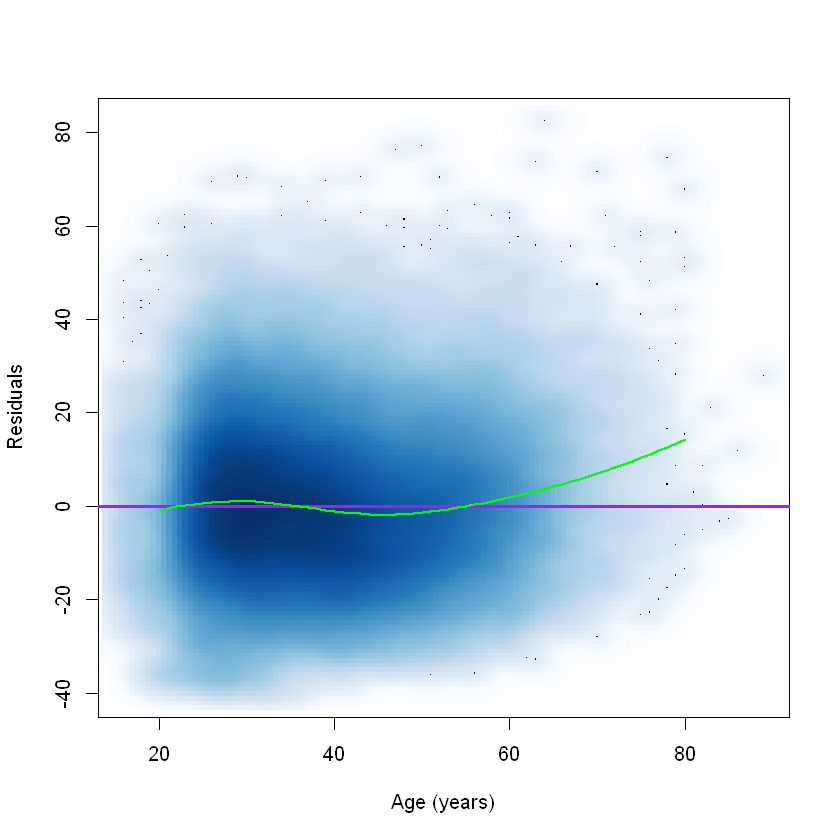

In [24]:
# pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

age20to80 = 20:80

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
# par(oldPar)
# dev.off()

In [25]:
menRes.lo = loess(runTime ~ age, cbMenSub)

In [26]:
menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

In [27]:
over50 = pmax(0, cbMenSub$age - 50)

In [28]:
lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

In [29]:
summary(lmOver50)


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.265 -10.099  -0.882   9.061  79.043 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.753919   0.265035  312.24   <2e-16 ***
age          0.105725   0.007147   14.79   <2e-16 ***
over50       0.563518   0.023367   24.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.71 on 69804 degrees of freedom
Multiple R-squared:  0.03453,	Adjusted R-squared:  0.0345 
F-statistic:  1248 on 2 and 69804 DF,  p-value: < 2.2e-16


In [30]:
decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

,over30,over40,over50,over60
69802,36,26,16,6
69803,11,1,0,0
69804,9,0,0,0
69805,26,16,6,0
69806,5,0,0,0
69807,18,8,0,0


In [31]:
lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

In [32]:
summary(lmPiecewise)


Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.921 -10.119  -0.885   9.023  78.965 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.228655   0.915245  81.102  < 2e-16 ***
age          0.424283   0.033207  12.777  < 2e-16 ***
over30      -0.477006   0.047778  -9.984  < 2e-16 ***
over40       0.221557   0.040666   5.448  5.1e-08 ***
over50       0.494521   0.052932   9.343  < 2e-16 ***
over60      -0.004866   0.077637  -0.063     0.95    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.7 on 69801 degrees of freedom
Multiple R-squared:  0.03592,	Adjusted R-squared:  0.03586 
F-statistic: 520.2 on 5 and 69801 DF,  p-value: < 2.2e-16


In [33]:
overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

In [34]:
tail(overAgeDF)

,age,over30,over40,over50,over60
56,75,45,35,25,15
57,76,46,36,26,16
58,77,47,37,27,17
59,78,48,38,28,18
60,79,49,39,29,19
61,80,50,40,30,20


In [35]:
predPiecewise = predict(lmPiecewise, overAgeDF)

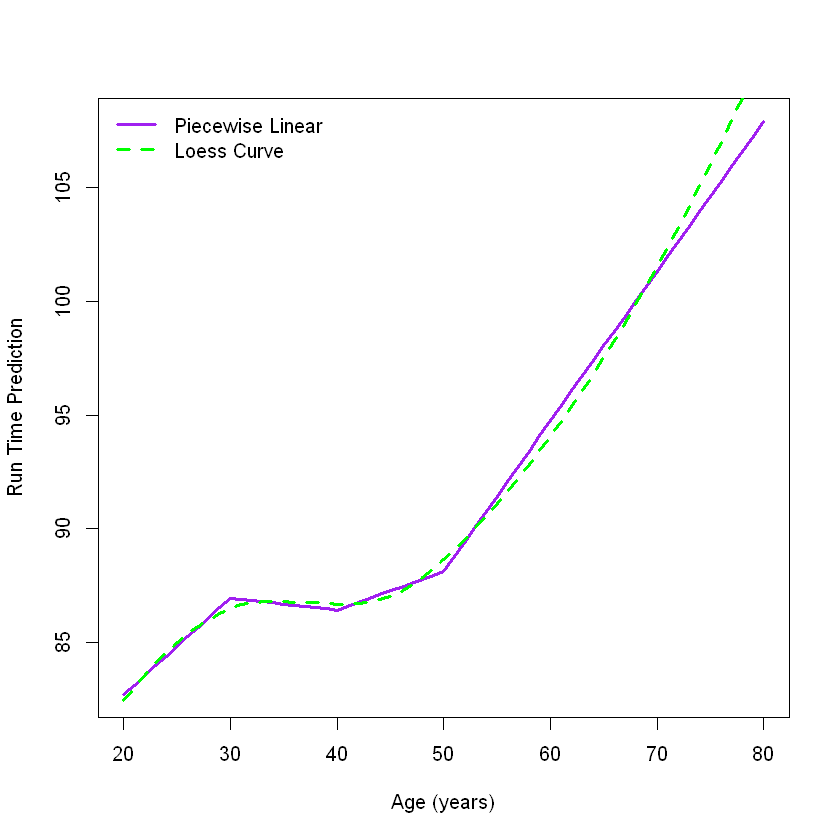

In [36]:
plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

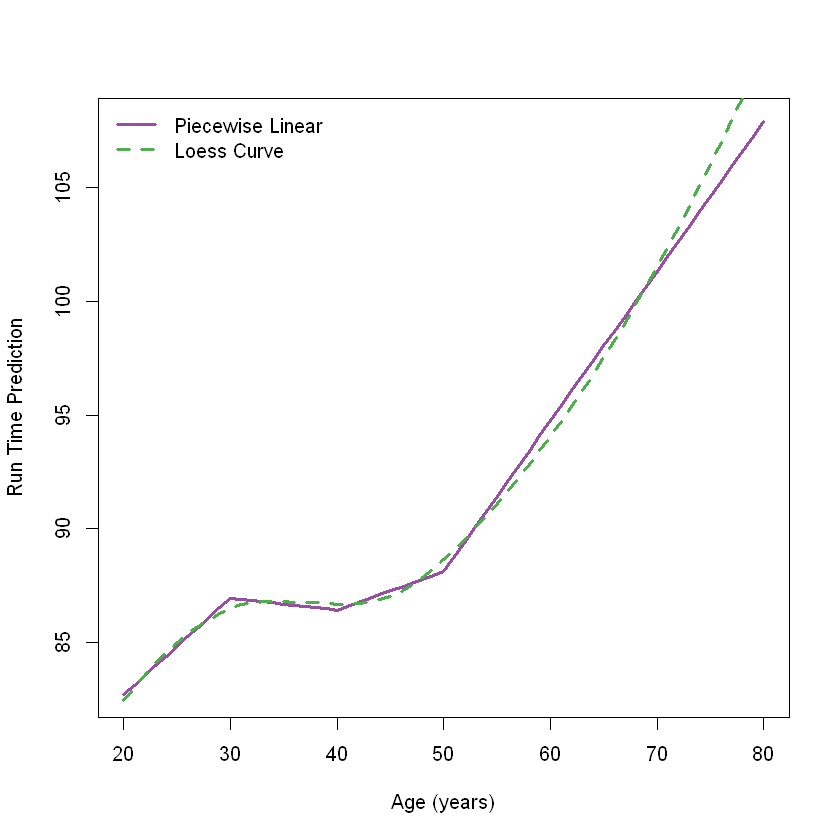

In [42]:
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
# dev.off()

### Section 2.4.3
This is where 2.4.3 starts. There are some good questions that guide the analysis at this point:
+ Are the age groups 30-39 and 40-49 composed of significantly different participants?
+ We expect the average performance to be similar across years but each year is composed of a self-selected group of participants. Has the composition of participants changed over the years?

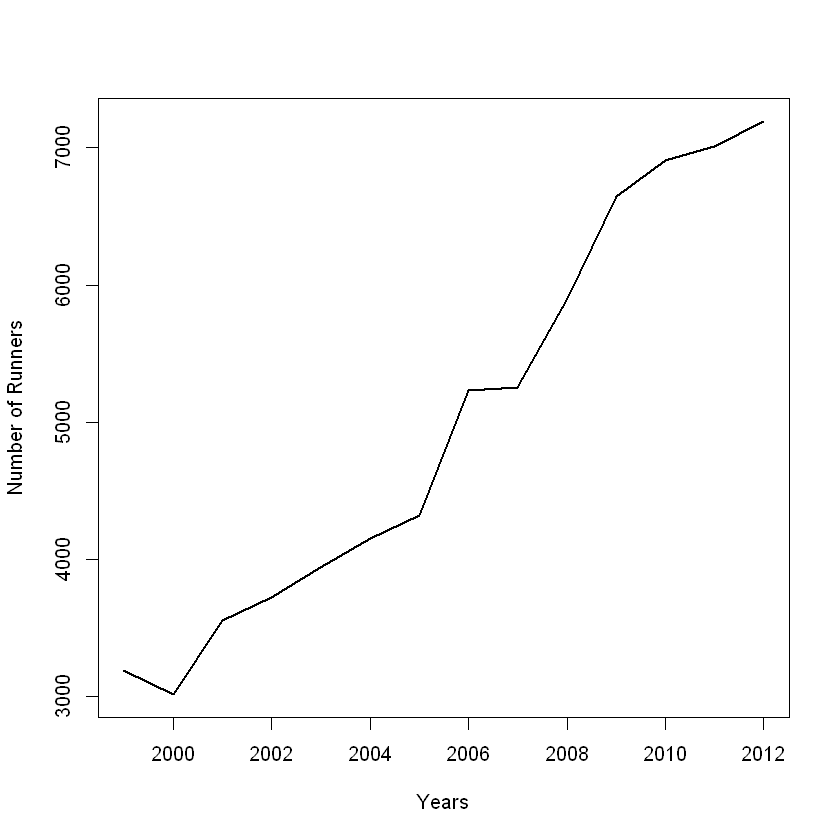

In [43]:
# pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

#here's the number of men runners in each of the years
numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
# par(oldPar)
# dev.off()

In [44]:
summary(cbMenSub$runTime[cbMenSub$year == 1999])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

In [45]:
summary(cbMenSub$runTime[cbMenSub$year == 2012])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

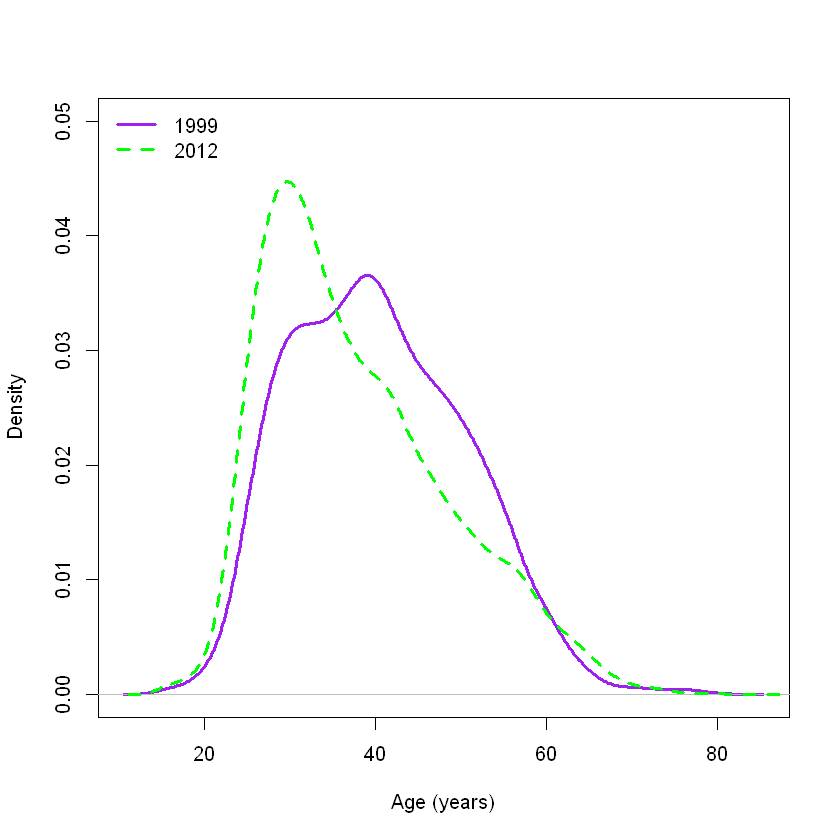

In [46]:
# pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

# par(oldPar)
# dev.off()

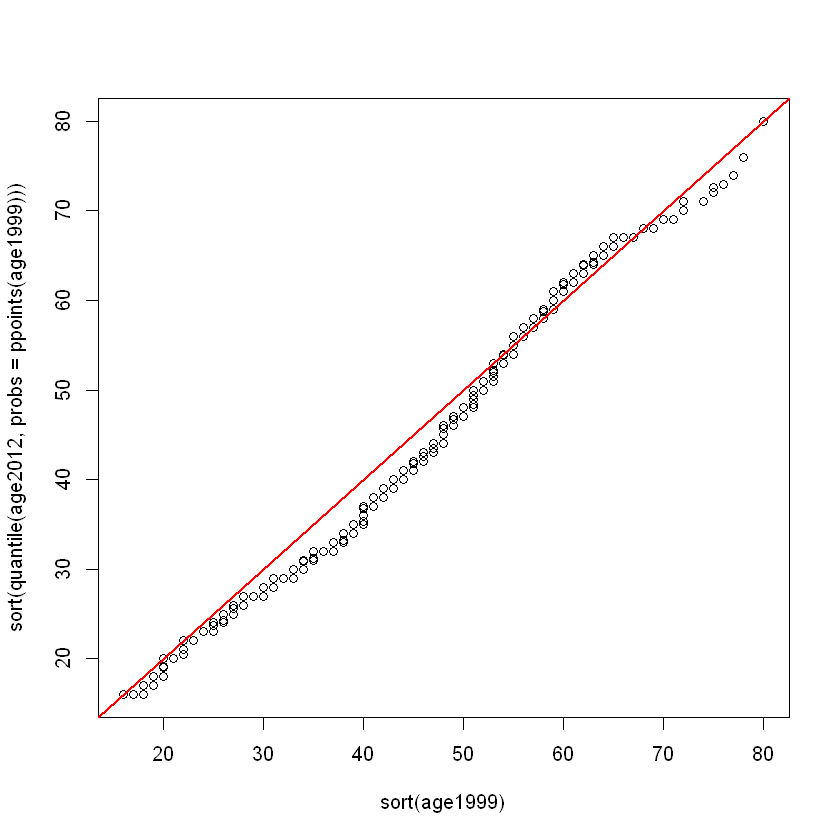

In [61]:
#comparing quantiles between the years 1999 and 2012. perfect:
#https://stats.stackexchange.com/questions/77907/generate-qq-plot-for-sets-of-different-size
plot(sort(age1999),sort(quantile(age2012, probs=ppoints(age1999))))
abline(a =0, b = 1, col="red", lwd = 2)

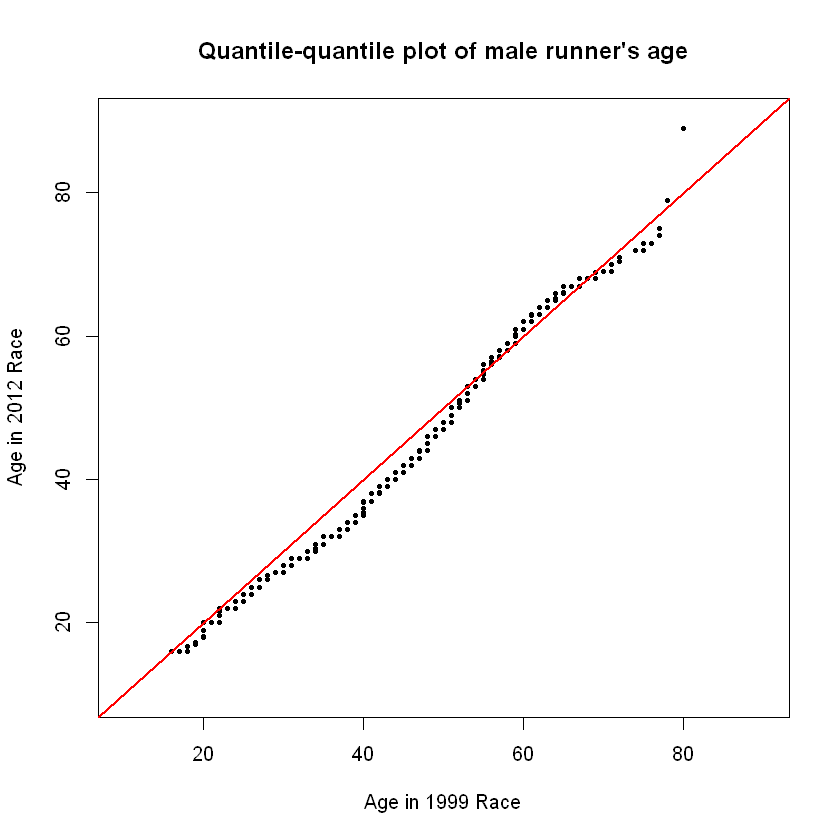

In [60]:
#or i could have just looked down a little bit and saw this code which is a little different
qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

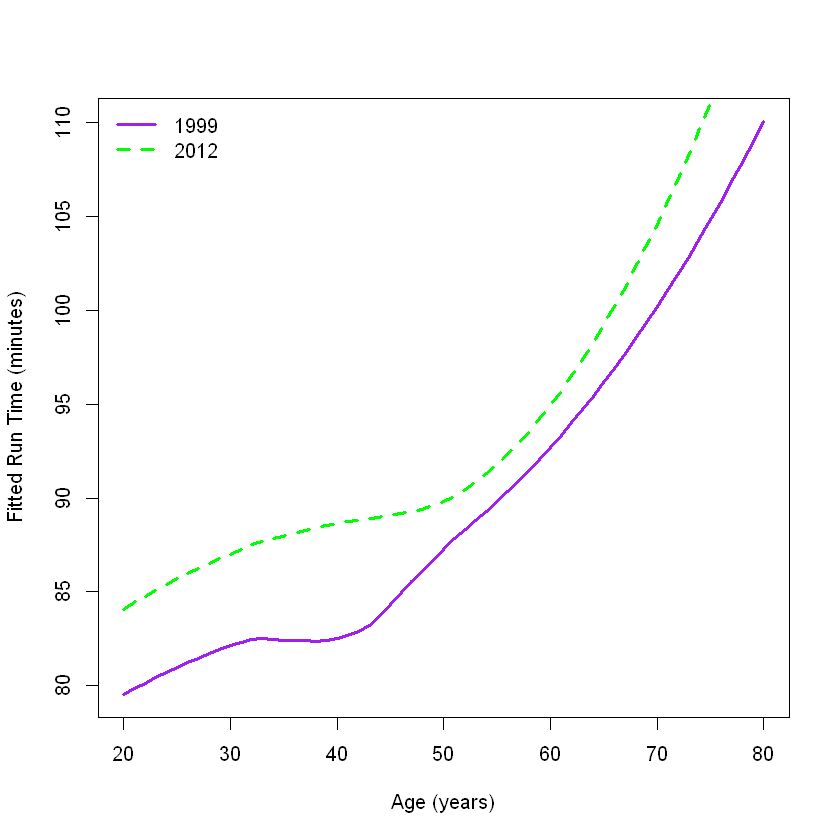

In [62]:
mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

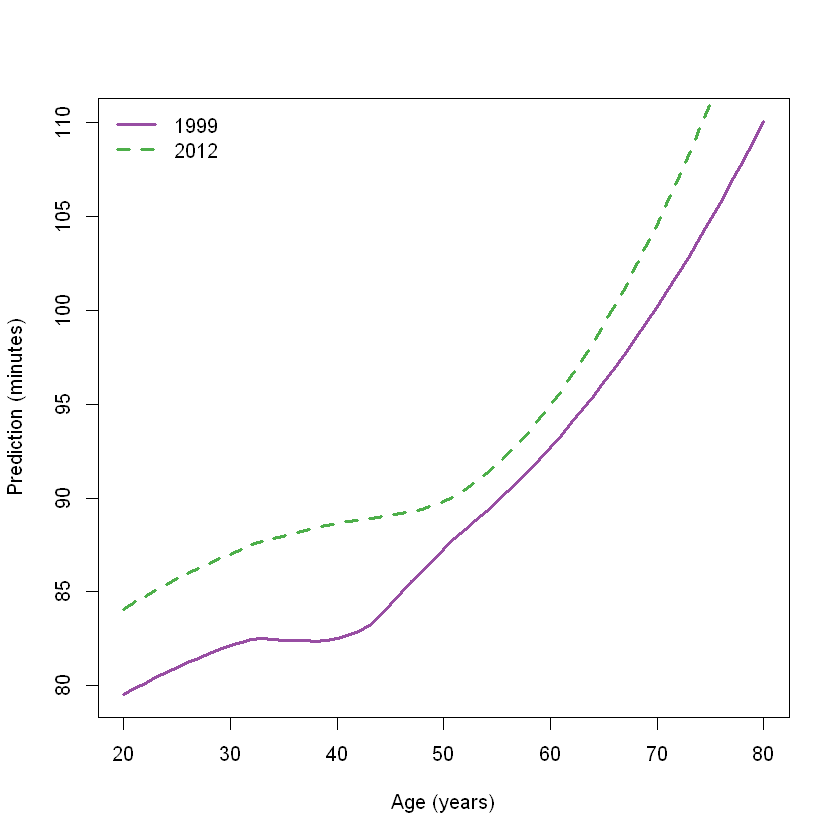

In [63]:
# pdf("CB_Loess99vs12.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")  
lines(x = age20to80, y = mR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")
# par(oldPar)
# dev.off()

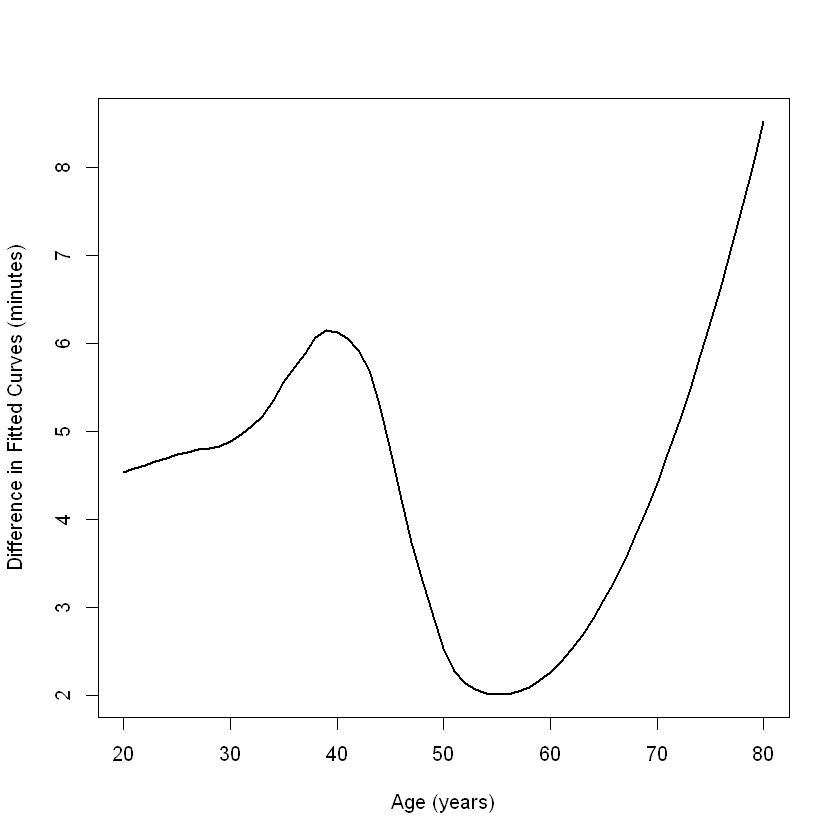

In [64]:
gap14 = mR.lo.pr12 - mR.lo.pr99

# pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
# par(oldPar)
# dev.off()

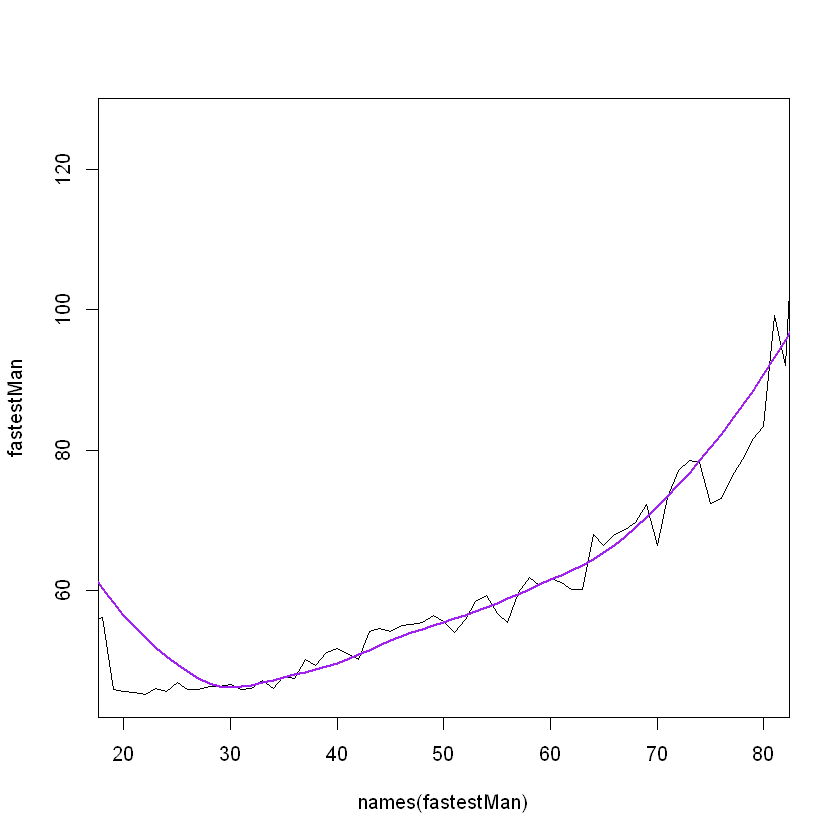

In [69]:
#i'm guessing this is the age-grading thing described in the book but
#we are missing the creation of the menRes dataframe so i just guess it is the cbMen dataframe, probably wrong...
menRes <- cbMen
names(menRes) <- c("year", "sex", "name", "home", "age", "time")
fastestMan = tapply(menRes$time, menRes$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", xlim = c(20, 80))
ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.7572  1.3639  1.5353  1.5568  1.7373  2.7394       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.7881  1.4430  1.6512  1.6764  1.8804  3.0014       2 

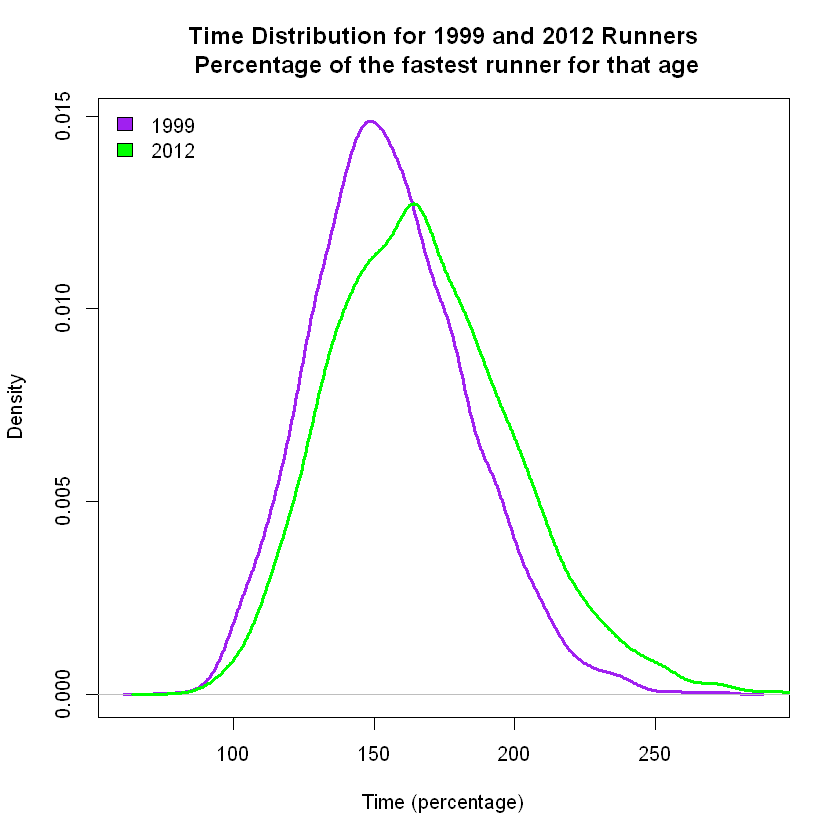

In [70]:
timeNorm = menRes$time / mR.lo.prF[as.character(menRes$age)]
time99Norm = timeNorm[menRes$year == 1999]
time12Norm = timeNorm[menRes$year == 2012]
summary(time99Norm)

summary(time12Norm)

plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple",
     lwd = 3,  xlab = "Time (percentage)",
     main = "Time Distribution for 1999 and 2012 Runners\n Percentage of the fastest runner for that age")
lines(density(100*time12Norm, na.rm = TRUE), 
          lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"),
       legend = c("1999", "2012"), bty = "n")

### 2.5 Constructing a Record for an Individual Runner across Years

In [ ]:
trimBlanks = function(charVector) {
  nameClean = gsub("^[[:blank:]]+", "", charVector)
  nameClean = gsub("[[:blank:]]+$", "", nameClean)
  nameClean = gsub("[[:blank:]]+", " ", nameClean)
}

nameClean = trimBlanks(cbMenSub$name)

length(nameClean)

length(unique(nameClean))

table(table(nameClean))

head( sort(table(nameClean), decreasing = TRUE), 1)

mSmith = cbMenSub[nameClean == "Michael Smith", ]

head(unique(mSmith$home))

nameClean = tolower(nameClean)

head( sort(table(nameClean), decreasing = TRUE), 1)

nameClean = gsub("[,.]", "", nameClean)

tabNameYr = table(cbMenSub$year, nameClean)

max(tabNameYr)

class(tabNameYr)

mode(tabNameYr)

names(attributes(tabNameYr))

dim(tabNameYr)

head(colnames(tabNameYr), 3)

which( tabNameYr == max(tabNameYr) )

which( tabNameYr == max(tabNameYr), arr.ind = TRUE )

indMax = which( tabNameYr == max(tabNameYr), arr.ind = TRUE )
colnames(tabNameYr)[indMax[2]]

cbMenSub$nameClean = nameClean

cbMenSub$yob = cbMenSub$year - cbMenSub$age

# Fix home in a similar way
homeClean = trimBlanks(tolower(cbMenSub$home))
cbMenSub$homeClean = gsub("[,.]", "", homeClean)

vars = c("year", "homeClean", "nameClean", "yob",  "runTime")
mb = which(nameClean == "michael brown")
birthOrder = order(cbMenSub$yob[mb])
cbMenSub[mb[birthOrder], vars]

cbMenSub$ID = paste(nameClean, cbMenSub$yob, sep = "_")

races = tapply(cbMenSub$year, cbMenSub$ID, length)

races8 = names(races)[which(races >= 8)]

men8 = cbMenSub[ cbMenSub$ID %in% races8, ]

orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(unique(men8$ID))

gapTime = tapply(men8$runTime, men8$ID,
                 function(t) any(abs(diff(t)) > 20))

gapTime = sapply(men8L, function(df) 
                          any(abs(diff(df$runTime)) > 20))

sum(gapTime)

lapply(men8L[ gapTime ][1:2], function(df) df[, vars])

homeLen = nchar(cbMenSub$homeClean)

cbMenSub$state = substr(cbMenSub$homeClean, 
                        start = homeLen - 1, stop = homeLen)

cbMenSub$state[cbMenSub$year == 2006] = NA

cbMenSub$ID = paste(cbMenSub$nameClean, cbMenSub$yob, 
                    cbMenSub$state, sep = "_")

numRaces = tapply(cbMenSub$year, cbMenSub$ID, length)
races8 = names(numRaces)[which(numRaces >= 8)]
men8 = cbMenSub[ cbMenSub$ID %in% races8, ]
orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(races8)

groups = 1 + (1:length(men8L) %% 9)

addRunners = function(listRunners, colors, numLty) 
{
  numRunners = length(listRunners)
  colIndx = 1 + (1:numRunners) %% length(colors)
  ltys = rep(1:numLty, each = length(colors), length = numRunners)

  mapply(function(df, i) {      
           lines(df$runTime ~ df$age, 
           col = colors[colIndx[i]], lwd = 2, lty = ltys[i])
         }, listRunners, i = 1:numRunners) 
}

colors = c("#e41a1c", "#377eb8","#4daf4a", "#984ea3", 
           "#ff7f00", "#a65628")
par(mfrow = c(3, 3), mar = c(2, 2, 1, 1))
invisible(
  sapply(1:9, function(grpId){
    plot( x = 0, y = 0, type = "n",
          xlim = c(20, 80), ylim = c(50, 130),
          xlab = "Age (years)", ylab = "Run Time (minutes)")
     
    addRunners(men8L[ groups == grpId ], colors, numLty = 6)
  }) )

fitOne = function(oneRunner, addLine = FALSE, col = "grey") {
  lmOne = lm(runTime ~ age, data = oneRunner)
  if (addLine) 
    lines(x = oneRunner$age, y = predict(lmOne), 
          col = col, lwd = 2, lty = 2)

  ind = floor( (nrow(oneRunner) + 1) / 2)
  res = c(coefficients(lmOne)[2], oneRunner$age[ind],
          predict(lmOne)[ind])
  names(res) = c("ageCoeff", "medAge", "predRunTime")
  return(res)
}

par(mfrow = c(1, 1), mar = c(5, 4, 1, 1))

plot( x = 0, y = 0, type = "n",
      xlim = c(20, 80), ylim = c(50, 130),
      xlab = "Age (years)", ylab = "Run Time (minutes)")
     
addRunners(men8L[ groups == 9 ], colors, numLty = 6)
lapply(men8L[groups == 9], fitOne, addLine = TRUE, col = "black")

men8LongFit = lapply(men8L, fitOne)

coeffs = sapply(men8LongFit, "[", "ageCoeff" )
ages = sapply(men8LongFit, "[", "medAge")

longCoeffs = lm(coeffs ~ ages)

summary(longCoeffs)

pdf("CB_LongCoeffs.pdf", width = 10, height = 7)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(coeffs ~ ages, xlab = "Median Age (years)",
     ylab = "Coefficient (minutes per race / year)")
abline(longCoeffs, col = "#984ea3", lwd = 3)
abline(h = 0, col="blue", lwd = 3)
loCoeffs = loess(coeffs ~ ages)
ageV = min(ages):max(ages)
predV = predict(loCoeffs, new = data.frame(ages = ageV))
lines(x = ageV, y = predV, lwd = 3, lty = 2, col = "#4daf4a")
par(oldPar)
dev.off()

library(XML)
ubase = "http://www.cherryblossom.org/"
url = paste(ubase, "results/2012/2012cucb10m-m.htm", sep = "")
doc = htmlParse(url)

preNode = getNodeSet(doc, "//pre")
 
txt = xmlValue(preNode[[1]])

nchar(txt)

substr(txt, 1, 50)

substr(txt, nchar(txt) - 50, nchar(txt))

els = strsplit(txt, "\\r\\n")[[1]]

length(els)

els[1:3]

els[ length(els) ]

extractResTable =
       # Retrieve data from web site, find preformatted text,
       # return as a character vector.
function(url)
{
  doc = htmlParse(url)
  preNode = getNodeSet(doc, "//pre")
  txt = xmlValue(preNode[[1]])
  els = strsplit(txt, "\r\n")[[1]]   
  
  return(els)
}

m2012 = extractResTable(url)

identical(m2012, els)

ubase = "http://www.cherryblossom.org/"
urls = paste(ubase, "results/", 1999:2012, "/",
             1999:2012, "cucb10m-m.htm", sep = "")

menTables = lapply(urls, extractResTable)

options(error = recover)
menTables = lapply(urls, extractResTable)

Browse[1]> ls()

Browse[1]> url

Browse[1]> length(preNode)

menURLs = 
  c("cb99m.htm", "cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

urls = paste(ubase, menURLs, sep = "")

urls[1:3]

menTables = lapply(urls, extractResTable)
names(menTables) = 1999:2012

sapply(menTables, length)

extractResTable =
  # Retrieve data from web site, 
  # find the preformatted text,
  # and return as a character vector.
function(url, year = 1999)
{
  doc = htmlParse(url)

  if (year == 2000) {
    # Get text from 4th font element
    # File is ill-formed so <pre> search doesn't work.
    ff = getNodeSet(doc, "//font")
    txt = xmlValue(ff[[4]])
  }
  else {
    preNode = getNodeSet(doc, "//pre")
    txt = xmlValue(preNode[[1]])
  } 
  
  els = strsplit(txt, "\r\n")[[1]]
  return(els)
}

years = 1999:2012
menTables = mapply(extractResTable, url = urls, year = years)
names(menTables) = years
sapply(menTables, length)

extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url)

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }


years = 1999:2012
menTables = mapply(extractResTable, url = urls, year = years)
names(menTables) = years
sapply(menTables, length)

#womenTables = mapply(extractResTable, url = urls, 
#                       year = years, sex = rep("female", 14))
#names(womenTables) = years
#sapply(womenTables, length)


save(menTables, file = "CBMenTextTables.rda")